In [1]:
import pandas
import matplotlib
import datetime

In [11]:
import coin_repository
import strategies

In [12]:
def get_interests(coin_repository, days=30):
    coin_df = coin_repository.get_data_frame()
    closes = coin_df['close']
    interest_dict = {}
    for i in closes.keys():
        j = i - datetime.timedelta(days)
        if closes.get(j) is None:
            continue
        interest = (closes[i] / closes[j]) - 1
    #     print(i, closes[i], closes[j], interest)
        interest_dict[i] = interest
        
    return pandas.Series(interest_dict)

In [40]:
# df = pandas.DataFrame({
#     'ETH': get_interests(coin_repository.CoinRepository('ETH')),
#     'BTC': get_interests(coin_repository.CoinRepository('BTC')),
#     'XRP': get_interests(coin_repository.CoinRepository('XRP')),
#     'BCH': get_interests(coin_repository.CoinRepository('BCH')),
#     'EOS': get_interests(coin_repository.CoinRepository('EOS')),
#     'XLM': get_interests(coin_repository.CoinRepository('XLM')),
#     'LTC': get_interests(coin_repository.CoinRepository('LTC')),
#     'ADA': get_interests(coin_repository.CoinRepository('ADA')),
#     'MIOTA': get_interests(coin_repository.CoinRepository('MIOTA')),
#     'USDT': get_interests(coin_repository.CoinRepository('USDT'))
# })

[('MIOTA', 1.9027082902625594), ('BTC', 0.7302943794927637), ('ETH', 0.6891123164439741), ('LTC', 0.651022304832714), ('BCH', 0.5477750585510908), ('XRP', 0.44380496235590505), ('XLM', 0.24937266491942234), ('USDT', 0.0031911510514948116), ('EOS', -0.2696629213483146)]


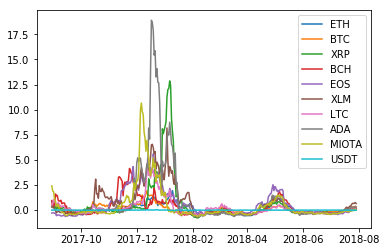

In [67]:
import numpy

coins = ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']

coin_dict = {}

for coin in coins:
    coin_dict[coin] = get_interests(coin_repository.CoinRepository(coin))
df = pandas.DataFrame(coin_dict)

coins_with_interests = []
for x in coins:
    a = df[x][datetime.date(2017, 8, 31)]
    if not numpy.isnan(a):
        coins_with_interests.append((x, df[x][datetime.date(2017, 8, 31)]))

def getKey(row):
    return row[1] 

sorted_coin = sorted(result, key=getKey, reverse=True)

df.plot()

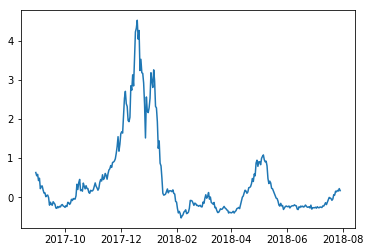

In [68]:
df[coins].mean(axis=1).plot()

In [ ]:
# for x in ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']:
#     month_later = df[x][datetime.date]
    
#     if not numpy.isnan(a):
#         result.append((x, df[x][datetime.date(2017, 8, 31)]))
# print(result)

In [61]:
# def getKey(row):
#     return row[1] 

# sorted(result, key=getKey, reverse=True)

[('MIOTA', 1.9027082902625594),
 ('BTC', 0.7302943794927637),
 ('ETH', 0.6891123164439741),
 ('LTC', 0.651022304832714),
 ('BCH', 0.5477750585510908),
 ('XRP', 0.44380496235590505),
 ('XLM', 0.24937266491942234),
 ('USDT', 0.0031911510514948116),
 ('EOS', -0.2696629213483146)]